In [1]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,walk_through_dir,unzip_data

In [2]:
# checking out directory and subdirectory in data
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [4]:
import tensorflow as tf

IMAGE_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMAGE_SIZE,
                                                                          batch_size=BATCH_SIZE,
                                                                          label_mode='categorical')

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                         image_size=IMAGE_SIZE,
                                                                         batch_size=BATCH_SIZE,
                                                                         label_mode='categorical')



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
# see example on batch of data
for image,label in train_data_10_percent.take(1):
    print(image,label)

tf.Tensor(
[[[[ 24.285715    11.285714     5.285714  ]
   [ 26.5         13.500001     7.5000005 ]
   [ 27.647959    14.647959     8.647959  ]
   ...
   [ 99.847       54.846996    14.12248   ]
   [112.50013     71.57157     25.357246  ]
   [135.74522     98.745224    46.74522   ]]

  [[ 26.331633    13.331633     7.3316326 ]
   [ 26.066326    13.066326     7.066326  ]
   [ 26.571428    13.571428     7.5714283 ]
   ...
   [ 95.18368     50.71433     12.198959  ]
   [104.9287      63.933804    19.642962  ]
   [132.16374     94.56684     44.35756   ]]

  [[ 24.357143    11.357142     5.357143  ]
   [ 23.729591    10.729592     4.729592  ]
   [ 25.357141    12.357142     6.3571424 ]
   ...
   [ 91.04594     46.61741     10.596944  ]
   [ 97.78065     55.88271     14.15309   ]
   [118.00056     79.86281     34.577026  ]]

  ...

  [[ 53.4643      35.525517    21.811274  ]
   [ 58.72441     42.58155     29.224453  ]
   [ 49.22944     37.703922    23.658052  ]
   ...
   [  8.785736     3.785

In [6]:
# create base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base model
base_model.trainable=False

# create the input into model
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# if using a model like Resnet50V2 you will need to normalize input
# x=tf.keras.experiment.preprocessing.Rescale(1./225)

# pass the input to the base_model
x=base_model(inputs)
print('shape after passing input through base model',x.shape)

# Average pool the output of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
print('shape after GlobalAveragePooling',x.shape)

# create the output activation layer
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

# combine the input with the output
model_0 =tf.keras.Model(inputs,outputs)

shape after passing input through base model (None, 7, 7, 1280)
shape after GlobalAveragePooling (None, 1280)


In [7]:
# compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0= model_0.fit(train_data_10_percent,
                       epochs=5,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data_10_percent,
                       validation_steps= int(0.25 *len(test_data_10_percent)),
                       callbacks=[create_tensorboard_callback(dir_name='transfer-learning',
                                                              experiment_name='10percent_feature_extraction')])

Saving TensorBoard log files to: transfer-learning/10percent_feature_extraction/20240717-100317
Epoch 1/5
24/24 [==============================] - 15s 302ms/step - loss: 1.8932 - accuracy: 0.4253 - val_loss: 1.3483 - val_accuracy: 0.7089
Epoch 2/5
24/24 [==============================] - 5s 188ms/step - loss: 1.0975 - accuracy: 0.7653 - val_loss: 0.8764 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 5s 188ms/step - loss: 0.7802 - accuracy: 0.8280 - val_loss: 0.7055 - val_accuracy: 0.8388
Epoch 4/5
24/24 [==============================] - 5s 188ms/step - loss: 0.6320 - accuracy: 0.8680 - val_loss: 0.6241 - val_accuracy: 0.8454
Epoch 5/5
24/24 [==============================] - 5s 189ms/step - loss: 0.5358 - accuracy: 0.8840 - val_loss: 0.5823 - val_accuracy: 0.8503


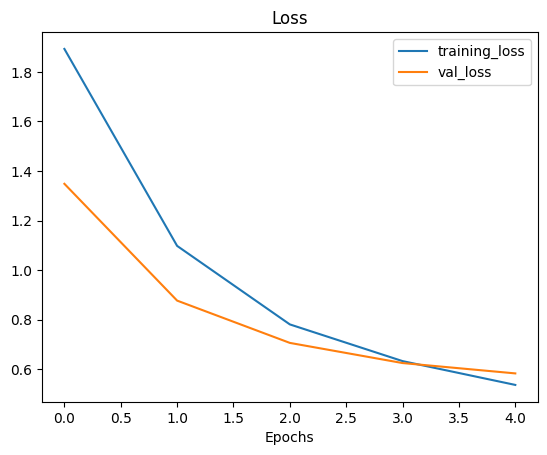

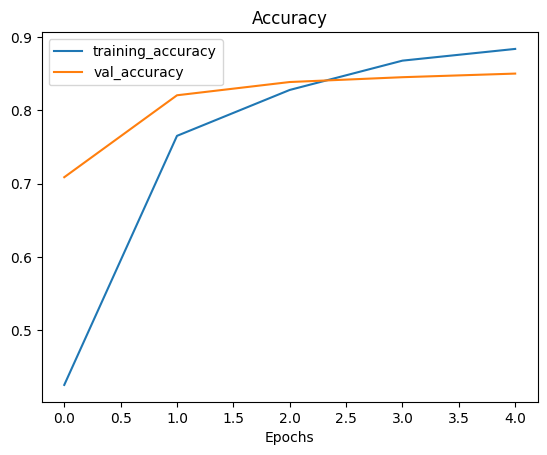

In [8]:
plot_loss_curves(history_0)

In [9]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 111ms/step - loss: 0.5526 - accuracy: 0.8628


[0.5526092052459717, 0.8628000020980835]

In [10]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [12]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [13]:
input_shape=(1,7,7,1280)

# create a random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor}\n")

# pass the random tensor through a global avg pooling 2d layer
global_avg_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print('2d global avg pooled random tensor:\n',global_avg_pooled_tensor)

print('shape of input tensor',input_tensor.shape)
print('shape of Global avg Pooled 2D tensor',global_avg_pooled_tensor.shape)

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337  ...  1.2239345  -0.16379032
     1.3785535 ]
   [-1.5401999  -1.1970718  -1.015505   ... -0.8313968   0.74773836
     1.5651373 ]
   [ 0.36974242 -2.0133252   0.47674894 ... -0.6174499  -0.9251019
    -0.5292798 ]
   ...
   [-1.4459095   2.4189284   0.5931171  ...  0.4000347   0.1045026
    -0.3930959 ]
   [-0.3357459  -0.00592449  0.19016078 ... -2.6061013  -0.85348386
    -1.2106847 ]
   [-0.58915883  0.9554476  -0.5978648  ...  0.35086414 -1.3153442
    -0.39510018]]

  [[ 1.2976652  -1.1689845   1.4274497  ...  1.5532643   1.7227225
    -1.653484  ]
   [-0.15505238  1.1058683   0.5083057  ...  1.4900261   0.19724938
     0.7874311 ]
   [ 0.49977157  1.6149553  -0.3705283  ... -1.7275968  -0.6636244
     1.5135366 ]
   ...
   [ 0.05088036  0.9352399   0.53097355 ...  1.1375513  -0.07536191
     1.1933966 ]
   [ 0.45567012 -1.1849481   1.6480986  ...  0.7209804  -0.4238234
     0.5169766 ]
   [ 0.05640245  0.18814978 -0.527

In [14]:
# let replace the globalavgpooling2d
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[ 0.04618312, -0.1354929 ,  0.31974795, ..., -0.1991748 ,
         0.11252911,  0.070036  ]], dtype=float32)>

In [15]:
# create input shape
input_shape=(1,4,4,3)

# create random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# pass the random tensor in globalAvgPooling 2d layer
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Average Pooled random tensor:\n{global_average_pooled_tensor}\n")

print(f"shape of input tensor: {input_tensor.shape}")
print(f"shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D Global Average Pooled random tensor:
[[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensor: (1, 4, 4, 3)
shape of Global Average Pooled 2D tensor: (1, 3)


In [16]:
# alternate to global average pooling 2d
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [17]:
# create training and test dir
train_dir_1percent='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'


In [18]:
walk_through_dir('10_food_classes_1_percent/')

There are 2 directories and 0 images in '10_food_classes_1_percent/'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test\sushi

In [19]:
train_data_1percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1percent,
                                                                        label_mode='categorical',
                                                                        batch_size=BATCH_SIZE,
                                                                        image_size=IMAGE_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)

data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),

],name='data_augmentation')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 481.5, 421.5, -0.5)

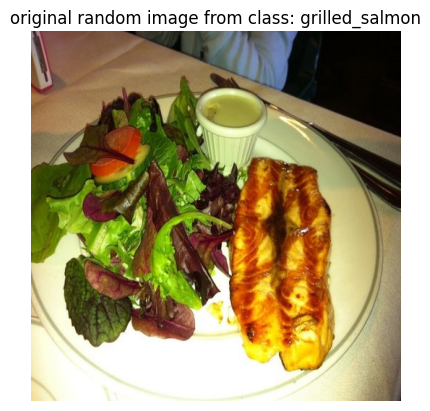

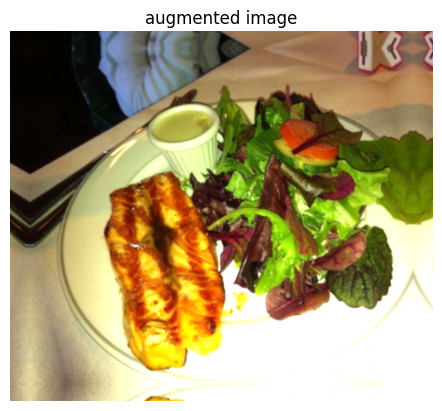

In [20]:
# view a random image and compare it to augmented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random 
target_class=random.choice(train_data_1percent.class_names)
target_dir='10_food_classes_1_percent/train/'+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image

img=mpimg.imread(random_image_path)
plt.title(f'original random image from class: {target_class}')
plt.imshow(img)
plt.axis(False)

# plot augmented random image
augmented_img=data_augmentation(img,training=True)
plt.figure()
plt.imshow(augmented_img/225.)
plt.title('augmented image')
plt.axis(False)

In [21]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# create input layer
inputs=tf.keras.layers.Input(shape=input_shape,name='input_layer')

# add in data augmentation
x=data_augmentation(inputs)

x=base_model(x)

x=tf.keras.layers.GlobalAveragePooling2D()(x)

outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1=tf.keras.Model(inputs,outputs)

#compile a model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_1=model_1.fit(train_data_1percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_1percent),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                             experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240717-100403
Epoch 1/5
3/3 [==============================] - 20s 6s/step - loss: 2.2401 - accuracy: 0.2143 - val_loss: 2.2167 - val_accuracy: 0.2136
Epoch 2/5
3/3 [==============================] - 11s 5s/step - loss: 1.9887 - accuracy: 0.3286 - val_loss: 2.0954 - val_accuracy: 0.3032
Epoch 3/5
3/3 [==============================] - 10s 5s/step - loss: 1.8213 - accuracy: 0.5000 - val_loss: 1.9869 - val_accuracy: 0.3796
Epoch 4/5
3/3 [==============================] - 10s 5s/step - loss: 1.6394 - accuracy: 0.6714 - val_loss: 1.8889 - val_accuracy: 0.4332
Epoch 5/5
3/3 [==============================] - 10s 5s/step - loss: 1.5654 - accuracy: 0.6571 - val_loss: 1.7977 - val_accuracy: 0.4892


In [22]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
result_1percent_data_aug=model_1.evaluate(test_data)
result_1percent_data_aug

79/79 [==============================] - 8s 102ms/step - loss: 1.7977 - accuracy: 0.4892


[1.7977454662322998, 0.48919999599456787]

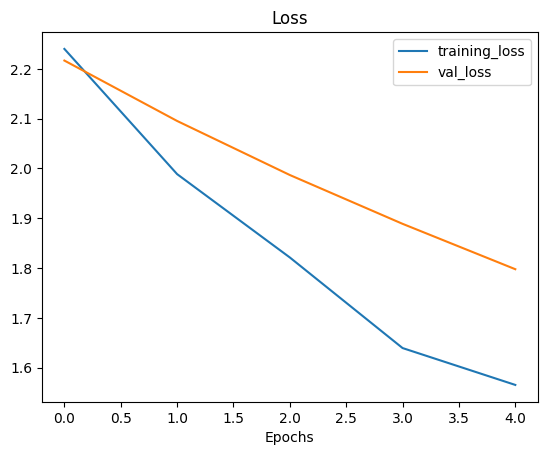

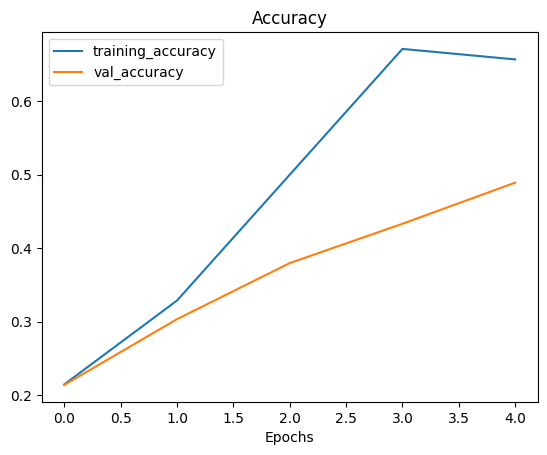

In [24]:
plot_loss_curves(history_1)

In [25]:
train_dir_10percent='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'


In [26]:
walk_through_dir('10_food_classes_10_percent/')

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percen

In [92]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10percent,
                                                               label_mode='categorical',
                                                               batch_size=16,
                                                               image_size=(64,64))
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              batch_size=16,
                                                              image_size=(64,64))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [93]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [110]:
# building data augmentation
data_augmentation= Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
],name='data_augmentation')

# create base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(64,64,3),name='input_layer')

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name='global_avg_pooling2d')(x)

outputs=layers.Dense(10,activation='softmax',name='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)

# compile 
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 64, 64, 3)        0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling2d (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-train

In [111]:
# set checkpoint path
checkpoint_path='ten_percent_model_checkpoint_weights/checkpoint.ckpt'

# create a model checkpoint
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)

In [112]:
history_10percent_data_aug=model_2.fit(train_data,
                                       epochs=5,
                                       validation_data=test_data,
                                       validation_steps=int(0.25*len(test_data)),
                                       callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                              experiment_name='10_percent_data_aug'),
                                                 checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240717-124051
Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 2.2462 - accuracy: 0.1587
Epoch 1: saving model to ten_percent_model_checkpoint_weights\checkpoint.ckpt
47/47 [==============================] - 16s 168ms/step - loss: 2.2462 - accuracy: 0.1587 - val_loss: 2.0771 - val_accuracy: 0.2388
Epoch 2/5
47/47 [==============================] - ETA: 0s - loss: 2.0061 - accuracy: 0.3227
Epoch 2: saving model to ten_percent_model_checkpoint_weights\checkpoint.ckpt
47/47 [==============================] - 6s 133ms/step - loss: 2.0061 - accuracy: 0.3227 - val_loss: 1.8724 - val_accuracy: 0.3397
Epoch 3/5
47/47 [==============================] - ETA: 0s - loss: 1.8409 - accuracy: 0.4067
Epoch 3: saving model to ten_percent_model_checkpoint_weights\checkpoint.ckpt
47/47 [==============================] - 6s 130ms/step - loss: 1.8409 - accuracy: 0.4067 - val_loss: 1.7398 - val_accuracy: 0.4103
Epoch 

In [113]:
model_0.evaluate(test_data)

157/157 [==============================] - 4s 22ms/step - loss: 2.1138 - accuracy: 0.2660


[2.113833427429199, 0.26600000262260437]

In [114]:
result_10_percent_data_aug=model_2.evaluate(test_data)
result_10_percent_data_aug

157/157 [==============================] - 4s 22ms/step - loss: 1.5638 - accuracy: 0.4724


[1.5638025999069214, 0.4724000096321106]

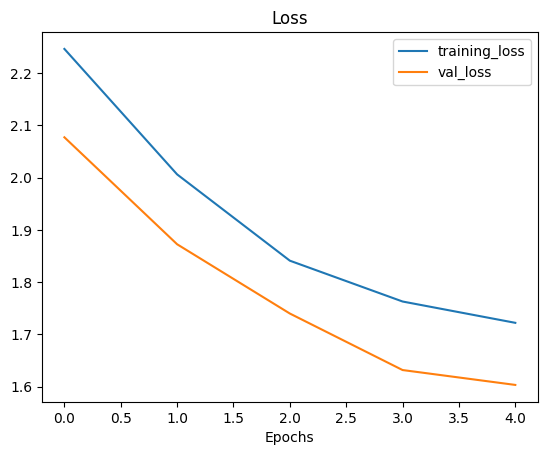

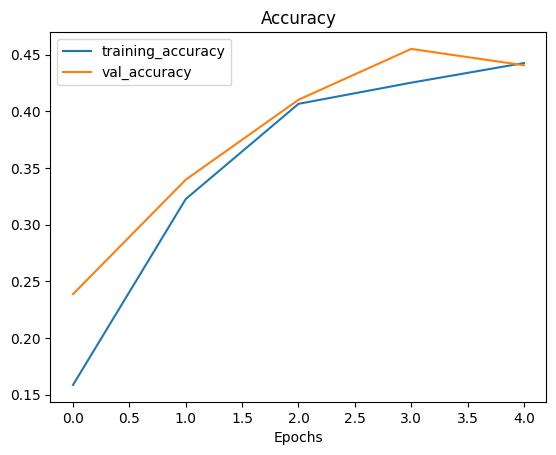

In [115]:
plot_loss_curves(history_10percent_data_aug)

In [116]:
# loading in checkpoint weight

model_2.load_weights(checkpoint_path)

In [117]:
loaded_weight_model_result=model_2.evaluate(test_data)

157/157 [==============================] - 4s 22ms/step - loss: 1.5638 - accuracy: 0.4724


In [118]:
result_10_percent_data_aug==loaded_weight_model_result

True

In [119]:
result_10_percent_data_aug

[1.5638025999069214, 0.4724000096321106]

In [120]:
loaded_weight_model_result

[1.5638025999069214, 0.4724000096321106]

In [121]:
import numpy as np
np.isclose(np.array(result_10_percent_data_aug),np.array(loaded_weight_model_result))

array([ True,  True])

In [122]:
model_2.layers

In [123]:
# are these layers trainable
for layer in model_2.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000164C921F430> True
<keras.engine.sequential.Sequential object at 0x00000164C44E87F0> True
<keras.engine.functional.Functional object at 0x00000164EE71E040> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x00000164ECC664F0> True
<keras.layers.core.dense.Dense object at 0x00000164ECB9A760> True


In [124]:
# what layers are in our model and trainable
for i,layer in enumerate(model_2.layers[2].layers):
    print(i,layer.name,layer.trainable)

0 input_19 False
1 rescaling_36 False
2 normalization_18 False
3 rescaling_37 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [126]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
    layer.trainable=False
    
# recompile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [127]:
for i,layer in enumerate(model_2.layers[2].layers):
    print(i,layer.name,layer.trainable)

0 input_19 False
1 rescaling_36 False
2 normalization_18 False
3 rescaling_37 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [128]:
# refit the model
history_fine_10_percent_data_aug=model_2.fit(train_data,
                                             epochs=10,
                                             validation_data=test_data,
                                             validation_steps=int(0.25*len(test_data)),
                                             initial_epoch=history_10percent_data_aug.epoch[-1],
                                             callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                    experiment_name='10_percent_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240717-152202
Epoch 5/10
47/47 [==============================] - 16s 169ms/step - loss: 1.5207 - accuracy: 0.5160 - val_loss: 1.5529 - val_accuracy: 0.4551
Epoch 6/10
47/47 [==============================] - 6s 129ms/step - loss: 1.4063 - accuracy: 0.5280 - val_loss: 1.5127 - val_accuracy: 0.4679
Epoch 7/10
47/47 [==============================] - 6s 130ms/step - loss: 1.2615 - accuracy: 0.5907 - val_loss: 1.4752 - val_accuracy: 0.5032
Epoch 8/10
47/47 [==============================] - 6s 130ms/step - loss: 1.2024 - accuracy: 0.5840 - val_loss: 1.4571 - val_accuracy: 0.4872
Epoch 9/10
47/47 [==============================] - 6s 126ms/step - loss: 1.2007 - accuracy: 0.5960 - val_loss: 1.4407 - val_accuracy: 0.4936
Epoch 10/10
47/47 [==============================] - 6s 129ms/step - loss: 1.1790 - accuracy: 0.5813 - val_loss: 1.4196 - val_accuracy: 0.5032


In [129]:
results_fine_tune_10_percent=model_2.evaluate(test_data)

157/157 [==============================] - 6s 39ms/step - loss: 1.3703 - accuracy: 0.5312


In [130]:
result_10_percent_data_aug

[1.5638025999069214, 0.4724000096321106]

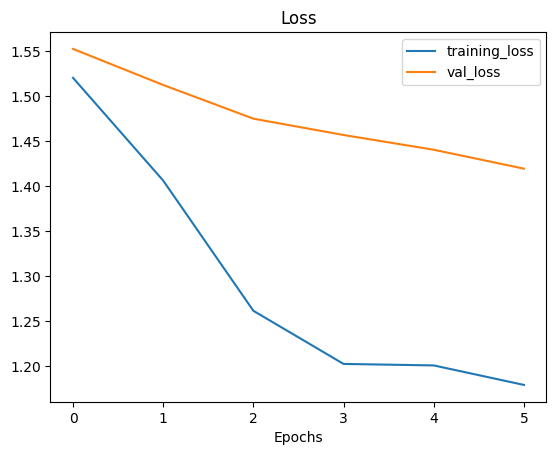

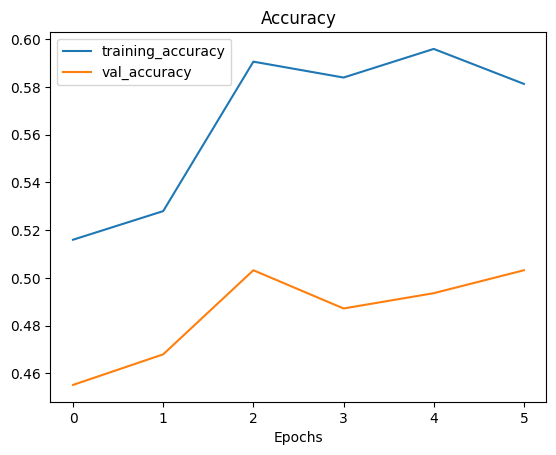

In [131]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [134]:
# let create a function to compare training histories
def compare_historys(original_history,new_history,initial_epochs=5):
    
    # original measurement
    acc=original_history.history['accuracy']
    loss=original_history.history['loss']
    
    val_acc=original_history.history['val_accuracy']
    val_loss=original_history.history['val_loss']
    
    # combine measurement
    total_acc=acc+new_history.history['accuracy']
    total_loss=loss+new_history.history['loss']
    
    total_val_acc=val_acc+new_history.history['val_accuracy']
    total_val_loss=val_loss+new_history.history['val_loss']
    
    
    # make plot
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label='Training Accuracy')
    plt.plot(total_val_acc,label='Val Accuracy')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('training and validation accuracy')
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss,label='Training Loss')
    plt.plot(total_val_loss,label='Val Loss')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('training and validation loss')

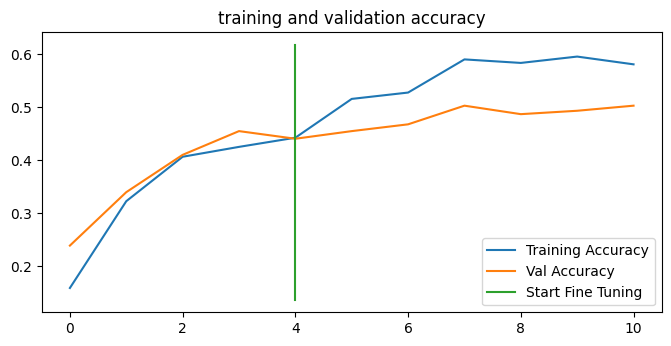

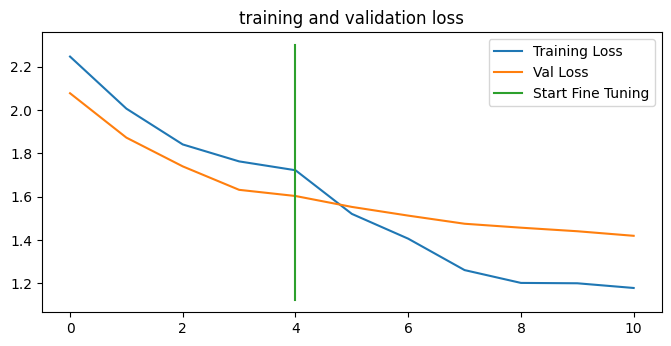

In [135]:
compare_historys(history_10percent_data_aug,history_fine_10_percent_data_aug)

In [136]:
# set up training and test dir
train_dir_all_data='10_food_classes_all_data/train'
test_data='10_food_classes_all_data/test'

In [138]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [148]:
IMG_SIZE=(64,64)
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [140]:
results_fine_tune_10_percent

[1.3703103065490723, 0.5311999917030334]

In [141]:
model_2.load_weights(checkpoint_path)

In [142]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 57ms/step - loss: 1.7280 - accuracy: 0.4328


[1.7279894351959229, 0.4327999949455261]

In [143]:
result_10_percent_data_aug

[1.5638025999069214, 0.4724000096321106]

In [144]:
for layer_number,layer in enumerate(model_2.layers):
    print(layer_number,layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_avg_pooling2d True
4 output_layer True


In [146]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name, layer.trainable)

0 input_19 False
1 rescaling_36 False
2 normalization_18 False
3 rescaling_37 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [149]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [150]:
history_fine_10_classes_full=model_2.fit(train_data_10_classes_full,
                                         epochs=10,
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         initial_epoch=history_10percent_data_aug.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                experiment_name='full_10_classes,fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/full_10_classes,fine_tune_last_10/20240717-162338
Epoch 5/10
235/235 [==============================] - 85s 311ms/step - loss: 1.5636 - accuracy: 0.4760 - val_loss: 1.2357 - val_accuracy: 0.6036
Epoch 6/10
235/235 [==============================] - 60s 254ms/step - loss: 1.4225 - accuracy: 0.5236 - val_loss: 1.1664 - val_accuracy: 0.6168
Epoch 7/10
235/235 [==============================] - 59s 249ms/step - loss: 1.3504 - accuracy: 0.5444 - val_loss: 1.1163 - val_accuracy: 0.6431
Epoch 8/10
235/235 [==============================] - 59s 251ms/step - loss: 1.3074 - accuracy: 0.5611 - val_loss: 1.0669 - val_accuracy: 0.6579
Epoch 9/10
235/235 [==============================] - 60s 253ms/step - loss: 1.2762 - accuracy: 0.5725 - val_loss: 1.0682 - val_accuracy: 0.6480
Epoch 10/10
235/235 [==============================] - 61s 258ms/step - loss: 1.2452 - accuracy: 0.5805 - val_loss: 1.0167 - val_accuracy: 0.6793


In [151]:
result_fine_tune_full_data=model_2.evaluate(test_data)
result_fine_tune_full_data

79/79 [==============================] - 4s 40ms/step - loss: 1.0695 - accuracy: 0.6352


[1.0695137977600098, 0.635200023651123]

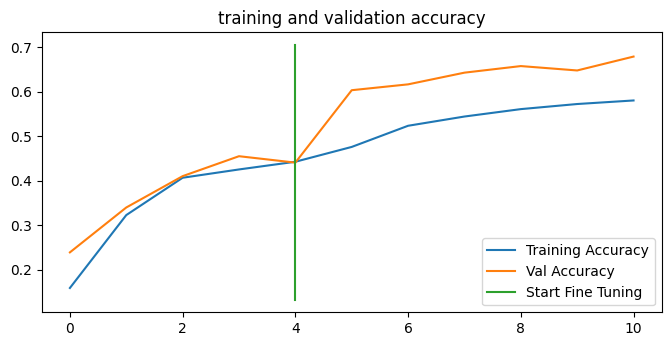

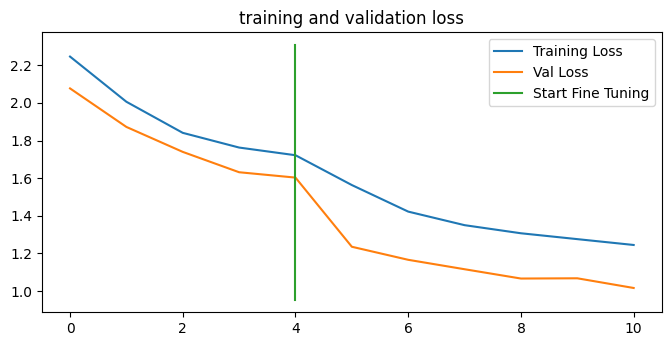

In [152]:
compare_historys(history_10percent_data_aug,
                 history_fine_10_classes_full)